In [1]:
pip install contextily

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Stage 1
#documents data cleaning e.g. removal of non-tag entries, non-English words etc.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import contextily
from datetime import datetime, timedelta #godsend of a package that allows us to conduct df manipulation to do with times 

#for word processing - NLP relevant libraries
import re
import nltk
from nltk.tokenize import word_tokenize
import gensim
import gensim.corpora as corpora

In [36]:
df = pd.read_csv('Flickr_data_2010_2019.csv')
df
#63987 rows

,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,geo_is_friend,...,longitude,owner,place_id,secret,server,tags,title,url_n,width_n,woeid
0,0,16,0,2010-01-09 13:15:20,0,0,5,0,0,0,...,-3.178053,29066848@N04,n5w0.EVTVLodJw,17d70c22ce,4039,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,320.0,26096.0
1,1,16,0,2010-01-08 15:10:54,0,0,5,0,0,0,...,-3.225216,7512717@N06,kvytL1JTU7n2hQ,fb6cb30938,4045,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,320.0,21379.0
2,2,16,0,2010-01-03 04:02:03,0,0,9,0,0,0,...,-3.187494,88411576@N06,A7YJ5HNVUbwIGw,69957b3c3a,8460,NaN,IMG_2439,https://live.staticflickr.com/8460/8073668369_...,320.0,43674.0
3,3,16,0,2010-01-03 02:14:26,0,0,9,0,0,0,...,-3.187526,88411576@N06,A7YJ5HNVUbwIGw,11bae4cd55,8313,NaN,IMG_2401,https://live.staticflickr.com/8313/8073670343_...,320.0,43674.0
4,4,16,0,2010-01-02 12:19:41,0,0,5,0,0,0,...,-3.209134,89764331@N00,IuVU9AdTUrq.BXsTqA,82095fb86c,4057,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,320.0,20094254.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63982,63982,16,0,2019-12-21 19:56:09,0,0,66,0,0,0,...,-3.211730,54084451@N06,NaN,27ca680fca,65535,lights winter christmas edinburgh plants magical,"Royal Botanic Gardens, Edinburgh",https://live.staticflickr.com/65535/4926492921...,320.0,9168473.0
63983,63983,16,0,2019-12-21 19:56:35,0,0,66,0,0,0,...,-3.211730,54084451@N06,NaN,573533e445,65535,lights winter christmas edinburgh plants magical,"Royal Botanic Gardens, Edinburgh",https://live.staticflickr.com/65535/4926427675...,283.0,9168473.0
63984,63984,16,0,2019-12-21 17:01:20,0,0,66,0,0,0,...,-3.169950,27718315@N02,NaN,1f3d618d18,65535,leith shore pub bar 2019 edinburgh malthops ma...,"Malt & Hops, Shore, Leith, Dec 2019",https://live.staticflickr.com/65535/4937367789...,320.0,2644641.0
63985,63985,16,0,2019-12-21 16:03:19,0,0,66,0,0,0,...,-3.191742,138571748@N07,NaN,69f2273d38,65535,candid canoneos750d cap citylife edinburgh edi...,Flat Cap,https://live.staticflickr.com/65535/4929850054...,320.0,3333229.0


In [37]:
#first I want to remove images without tags
#from the data inspection, I see that no tags are indicated by NaN
df.dropna(subset = ["tags"], inplace=True)


#reset index so it runs from 1 to whatever the last entry is without random gaps
df_no_tags_removed = df.reset_index(drop=True)

df_no_tags_removed
#49950 
#whoa, 14,037 posts without tags...

#export to csv showing all geotagged images
#df.to_csv(r'flickr_tags_only_posts.csv', index = False)

,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,geo_is_friend,...,longitude,owner,place_id,secret,server,tags,title,url_n,width_n,woeid
0,0,16,0,2010-01-09 13:15:20,0,0,5,0,0,0,...,-3.178053,29066848@N04,n5w0.EVTVLodJw,17d70c22ce,4039,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,320.0,26096.0
1,1,16,0,2010-01-08 15:10:54,0,0,5,0,0,0,...,-3.225216,7512717@N06,kvytL1JTU7n2hQ,fb6cb30938,4045,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,320.0,21379.0
2,4,16,0,2010-01-02 12:19:41,0,0,5,0,0,0,...,-3.209134,89764331@N00,IuVU9AdTUrq.BXsTqA,82095fb86c,4057,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,320.0,20094254.0
3,5,16,0,2010-01-01 17:31:55,0,0,5,0,0,0,...,-3.174576,24317021@N07,IjEhjhRVUbwuZw,75a1649e18,4053,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/4053/4234840366_...,320.0,43669.0
4,6,16,0,2010-01-01 17:31:17,0,0,3,0,0,0,...,-3.174576,24317021@N07,IjEhjhRVUbwuZw,0069a2c847,2652,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/2652/4234065291_...,320.0,43669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49945,63981,16,0,2019-12-21 19:58:35,0,0,66,0,0,0,...,-3.192642,27718315@N02,NaN,4e4b611fa9,65535,karaoke 2019 christmas,"Richard's Christmas Drinks, Dec 2019",https://live.staticflickr.com/65535/4937425722...,240.0,6697590.0
49946,63982,16,0,2019-12-21 19:56:09,0,0,66,0,0,0,...,-3.211730,54084451@N06,NaN,27ca680fca,65535,lights winter christmas edinburgh plants magical,"Royal Botanic Gardens, Edinburgh",https://live.staticflickr.com/65535/4926492921...,320.0,9168473.0
49947,63983,16,0,2019-12-21 19:56:35,0,0,66,0,0,0,...,-3.211730,54084451@N06,NaN,573533e445,65535,lights winter christmas edinburgh plants magical,"Royal Botanic Gardens, Edinburgh",https://live.staticflickr.com/65535/4926427675...,283.0,9168473.0
49948,63984,16,0,2019-12-21 17:01:20,0,0,66,0,0,0,...,-3.169950,27718315@N02,NaN,1f3d618d18,65535,leith shore pub bar 2019 edinburgh malthops ma...,"Malt & Hops, Shore, Leith, Dec 2019",https://live.staticflickr.com/65535/4937367789...,320.0,2644641.0


In [38]:
#add in columns for date, time and year to prepare for plotting
df['date'] = df.datetaken.str[:10]
df['time'] = df.datetaken.str[10:]
df['year'] = df.datetaken.str[:4]


#df.info() #inspect dtypes of df
df['datetaken'] = pd.to_datetime(df_filtered['datetaken']) #convert dattaken col of type object to datetime

#select column with dtype datetime
#df.select_dtypes(include=[np.datetime64]) #ok, this worked!


number of days where posting took place: 3391
Avg. number of posts per day: 10.31
Avg. number of posts per hour: 0.43
Avg. number of observations per min: 0.01


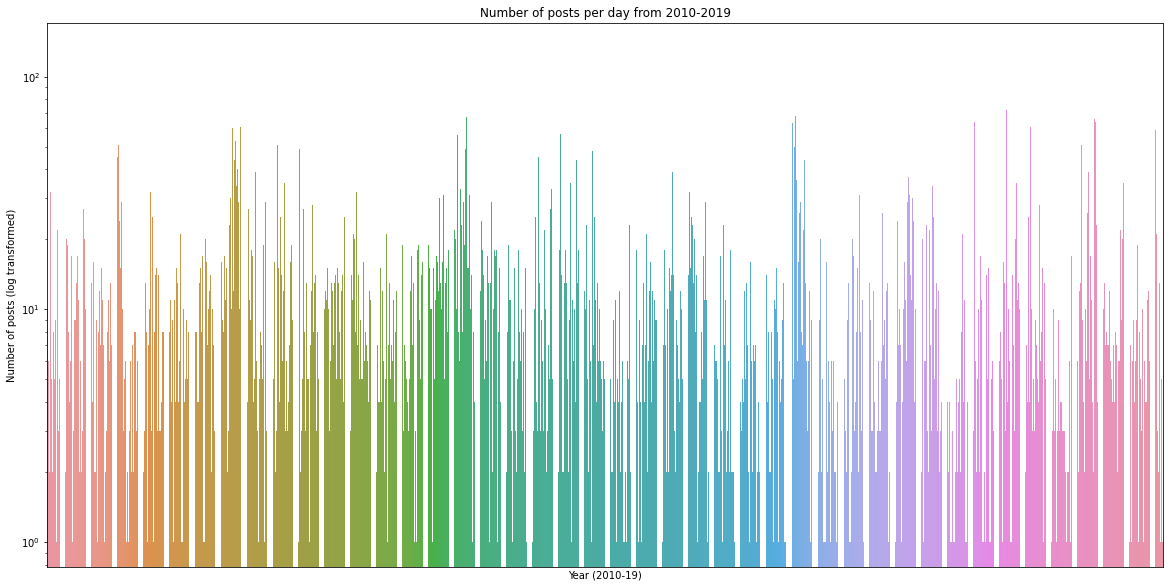

In [24]:
##INTIAL VISUALISATION TO GET A FEEL OF DATA
#VISUALISED PRIOR TO DATA CLEANING BUT CONTAINS ALL GEOTAGGED POSTS WITH TAGS


#plotting graphs that show daily distributions of posts
num_days = df['date'].nunique()
avg_day = (df.shape[0]) / (num_days) 
avg_hr = avg_day / 24
avg_min = avg_hr / 60


print(f'number of days where posting took place: {num_days}')
print(f'Avg. number of posts per day: {round(avg_day, 2)}')
print(f'Avg. number of posts per hour: {round(avg_hr, 2)}')
print(f'Avg. number of observations per min: {round(avg_min, 2)}')



fig = plt.gcf(); ax = plt.gca()
fig.set_size_inches(20,10)
sns.countplot(x='date', data=df)
plt.yscale('log')
ax.set_xlabel('Year (2010-19)')
ax.xaxis.set_ticks([])
ax.set_xticklabels('')
ax.set_ylabel('Number of posts (log transformed)')
ax.set_title('Number of posts per day from 2010-2019')
plt.show()

In [47]:
#erad in this csv which has manually had time, year and date added onto it via Excel
#for some odd reason, the 2nd plotting function (for yearly plots) won't run with the df rendered in-house 

df_filtered = pd.read_csv("flickr_tags_only_posts.csv")
df_filtered['datetaken'] = pd.to_datetime(df_filtered['datetaken']) #convert dattaken col of type object to datetime


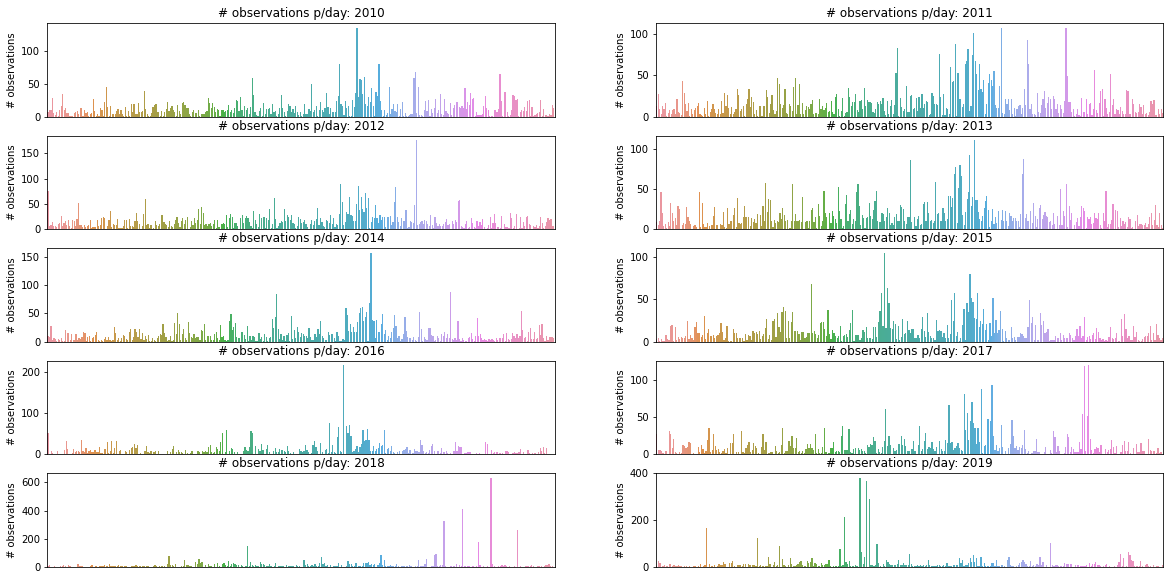

In [48]:
def draw_obs_plot(ax, yr):
    '''
    Draw countplot of posts per day per year
    '''
    
    sns.countplot(x='date', data=df_filtered[df_filtered['year'] == yr], ax=ax) #join the desired df columns/plot params to function's parameters
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.xaxis.set_ticks([])
    #plt.yscale('log')
    ax.set_ylabel('# observations')
    ax.set_title('# observations p/day: %i' % yr)

fig, axes = plt.subplots(5,2); axes = axes.flatten() #sets plotting dimensions to 2x2
fig.set_size_inches(20,10)

years = [2010,2011,2012,2013,2014,2015,2016,2017, 2018, 2019]
for (ax, yr) in zip(axes, years): #draw plot using above-defined function for data in years 2017-19 
    draw_obs_plot(ax, yr)
    
#fig.delaxes(axes[5]) #hide the fourth plot as dimension originally set to 2x2 (4 plots)
plt.show()

#relatively sensible distributions in 2017, similar to the distributions in 2018 and 2019 on an average basis
#in 2018 and 2019 plots, it's clear that there is a major peak in posts in certain days and/or months
#these may likely be users who have posted multiple times in a day --> this is an issue as it teases out the issue of 'participation'
#inequality'

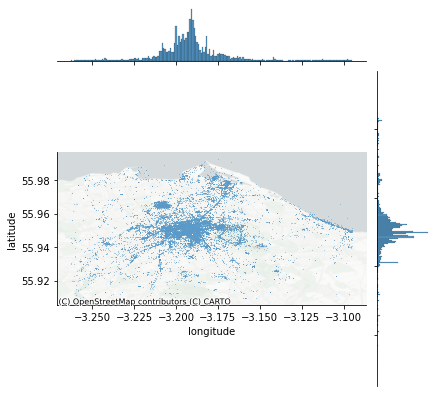

In [17]:
#distriubtion of posts with tags only/ i.e. data to be analysed 

joint_axes = sns.jointplot(x='longitude', y='latitude', kind = "scatter", data=df, s=0.5)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels
);

In [49]:
##EVALUATION FOR PARTICIPATION INEQUALITY
#inspect duplicated rows - it appears there are 11392  entries duplicated with the same tags posted in same location
df_filtered[df_filtered.duplicated(['latitude','longitude','tags', 'owner'], keep = False)]

#drop these duplicates
#keep = "first" to only retain the first occurence but get rid of subsequent duplicates
df_filtered.drop_duplicates(subset=['latitude', 'longitude', 'tags','owner'], keep = "first", inplace = True)

#reset index 
df_filtered.reset_index(drop = True)

#34976 rows remain


,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,geo_is_friend,...,latitude,longitude,owner,secret,tags,title,url_n,date,time,year
0,0,16,0,2010-09-01 13:15:00,0,0,5,0,0,0,...,55.981241,-3.178053,29066848@N04,17d70c22ce,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,09/01/2010,13:15:00,2010
1,1,16,0,2010-08-01 15:10:00,0,0,5,0,0,0,...,55.933246,-3.225216,7512717@N06,fb6cb30938,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,08/01/2010,15:10:00,2010
2,4,16,0,2010-02-01 12:19:00,0,0,5,0,0,0,...,55.963780,-3.209134,89764331@N00,82095fb86c,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,02/01/2010,12:19:00,2010
3,5,16,0,2010-01-01 17:31:00,0,0,5,0,0,0,...,55.952587,-3.174576,24317021@N07,75a1649e18,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/4053/4234840366_...,01/01/2010,17:31:00,2010
4,6,16,0,2010-01-01 17:31:00,0,0,3,0,0,0,...,55.952587,-3.174576,24317021@N07,0069a2c847,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/2652/4234065291_...,01/01/2010,17:31:00,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34971,63979,16,0,2019-12-21 23:20:00,0,0,66,0,0,0,...,55.949938,-3.187820,11451860@N08,de30620c44,edinburgh jazzbar trumpet musician male,"The Jazz Bar, Edinburgh",https://live.staticflickr.com/65535/4927802449...,21/12/2019,23:20:00,2019
34972,63980,16,0,2019-12-21 20:03:00,0,0,66,0,0,0,...,55.964545,-3.211730,54084451@N06,0f0db39316,lights winter christmas edinburgh plants magical,Glass House,https://live.staticflickr.com/65535/4926427514...,21/12/2019,20:03:00,2019
34973,63981,16,0,2019-12-21 19:58:00,0,0,66,0,0,0,...,55.980758,-3.192642,27718315@N02,4e4b611fa9,karaoke 2019 christmas,"Richard's Christmas Drinks, Dec 2019",https://live.staticflickr.com/65535/4937425722...,21/12/2019,19:58:00,2019
34974,63984,16,0,2019-12-21 17:01:00,0,0,66,0,0,0,...,55.975977,-3.169950,27718315@N02,1f3d618d18,leith shore pub bar 2019 edinburgh malthops ma...,"Malt & Hops, Shore, Leith, Dec 2019",https://live.staticflickr.com/65535/4937367789...,21/12/2019,17:01:00,2019


In [50]:
#A user only contributes only a single image across the entire time period of the obtained data

#group by owner to inspect number of times each owner has posted
#note: just only including groupby won't actually print out the dataframe (only the pandas object)
grouped = df_filtered.groupby(['owner'], as_index=False).count().reset_index()
grouped
#here, we are only interested in observing those with counts = 1 as this indicates the owners only posted once in entire period/df
grouped_multiple_posts = grouped[(grouped['tags'] == 1)] 
grouped_multiple_posts

#ok, so 844 unique posters only posted once during this period

#here we make an subset df to create an outer join that tells Python we want to match 
#all entries in the original df (df_filtered) that contains the unique posters
#then == False drops all the matches
df_filtered = df_filtered[df_filtered["owner"].isin(grouped_multiple_posts["owner"]) == False].reset_index()


df_filtered

#32956 entries remain
#yay, it worked!


,index,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,...,latitude,longitude,owner,secret,tags,title,url_n,date,time,year
0,0,0,16,0,2010-09-01 13:15:00,0,0,5,0,0,...,55.981241,-3.178053,29066848@N04,17d70c22ce,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,09/01/2010,13:15:00,2010
1,1,1,16,0,2010-08-01 15:10:00,0,0,5,0,0,...,55.933246,-3.225216,7512717@N06,fb6cb30938,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,08/01/2010,15:10:00,2010
2,2,4,16,0,2010-02-01 12:19:00,0,0,5,0,0,...,55.963780,-3.209134,89764331@N00,82095fb86c,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,02/01/2010,12:19:00,2010
3,3,5,16,0,2010-01-01 17:31:00,0,0,5,0,0,...,55.952587,-3.174576,24317021@N07,75a1649e18,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/4053/4234840366_...,01/01/2010,17:31:00,2010
4,4,6,16,0,2010-01-01 17:31:00,0,0,3,0,0,...,55.952587,-3.174576,24317021@N07,0069a2c847,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/2652/4234065291_...,01/01/2010,17:31:00,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32951,49942,63977,16,0,2019-12-22 18:37:00,0,0,66,0,0,...,55.952593,-3.193802,62158564@N00,371150b625,iansdigitalphotos edinburghchristmas2019 night...,Christmas treats,https://live.staticflickr.com/65535/4926039462...,22/12/2019,18:37:00,2019
32952,49943,63979,16,0,2019-12-21 23:20:00,0,0,66,0,0,...,55.949938,-3.187820,11451860@N08,de30620c44,edinburgh jazzbar trumpet musician male,"The Jazz Bar, Edinburgh",https://live.staticflickr.com/65535/4927802449...,21/12/2019,23:20:00,2019
32953,49945,63981,16,0,2019-12-21 19:58:00,0,0,66,0,0,...,55.980758,-3.192642,27718315@N02,4e4b611fa9,karaoke 2019 christmas,"Richard's Christmas Drinks, Dec 2019",https://live.staticflickr.com/65535/4937425722...,21/12/2019,19:58:00,2019
32954,49948,63984,16,0,2019-12-21 17:01:00,0,0,66,0,0,...,55.975977,-3.169950,27718315@N02,1f3d618d18,leith shore pub bar 2019 edinburgh malthops ma...,"Malt & Hops, Shore, Leith, Dec 2019",https://live.staticflickr.com/65535/4937367789...,21/12/2019,17:01:00,2019


In [93]:
#ok need to subset data so the kernel doesn't die
df_filtered_1 = df_filtered[:16478]
#df_filtered_part1.to_csv("df_filtered_part1.csv")

df_filtered_2 = df_filtered[:-16478]
#df_filtered_part2.to_csv("df_filtered_part2.csv")

In [94]:
#here we create a pandas dataframe containing columns grouped by owner and posting area
#and further aggregated by the min and max datetimes
#drop set to "false" to retains all column names

image_per_24_hrs = pd.DataFrame(df_filtered_1.groupby(['owner', 'longitude', 'latitude']).\
                              agg({'datetaken' : [np.min, np.max]})).reset_index(drop=False)

#droplevel set to 0 to dissolve 'levels' in df columns
image_per_24_hrs.columns = image_per_24_hrs.columns.droplevel(0)


#convert amin and amax columns to datetime dtype
image_per_24_hrs['amin'] = pd.to_datetime(image_per_24_hrs['amin']) 
image_per_24_hrs['amax'] = pd.to_datetime(image_per_24_hrs['amax']) 

#check to see if it's worked
#image_per_24_hrs.info()

#create new field in df showing T/F based on conditional operator
#If min and max posting times are within 24 horus, highlight as True
image_per_24_hrs['within24_hrs'] = np.where(image_per_24_hrs['amax'] - image_per_24_hrs['amin'] < timedelta(hours=24), 
                                           True, False)

image_per_24_hrs.columns =['owner', 'longitude', 'latitude', 'amin','amax', 'within_24_hrs']
high_posters = image_per_24_hrs[(image_per_24_hrs['within_24_hrs'] == True)] 

high_posters
#the results show the locations at which posters posted more than once in 24 hours


,owner,longitude,latitude,amin,amax,within_24_hrs
0,100314969@N03,-3.200631,55.947791,2013-09-28 15:37:00,2013-09-28 15:37:00,True
1,100314969@N03,-3.191673,55.949658,2013-09-28 16:57:00,2013-09-28 16:57:00,True
2,100749579@N04,-3.174469,55.954912,2013-09-28 15:48:00,2013-09-28 15:48:00,True
3,100857282@N08,-3.193834,55.948666,2013-08-21 19:26:00,2013-08-21 19:26:00,True
4,100857282@N08,-3.190000,55.949833,2013-08-22 19:24:00,2013-08-22 19:24:00,True
...,...,...,...,...,...,...
12907,99893428@N03,-3.199811,55.948431,2013-09-08 12:49:00,2013-09-08 12:49:00,True
12908,99893428@N03,-3.196088,55.947331,2013-09-26 13:25:00,2013-09-26 13:25:00,True
12909,99893428@N03,-3.188503,55.951783,2013-01-08 22:56:00,2013-01-08 22:56:00,True
12910,99893428@N03,-3.175585,55.946568,2013-09-08 20:04:00,2013-09-08 20:04:00,True


In [95]:
#we now want to filter the df_filtered with the owners here but keeping only 1 picture from their string of posts

#first create an inner join on owner and append to new df
#the result is that of the df_filtered but also containing joined columns from high_posters
df_merge = pd.merge(df_filtered, high_posters, on=['owner'], how='inner')
df1_filtered = df_filtered.append(df_merge) 

#identify common row values from the joined df and remove keeping only the first posting from that owner at that location
df1_filtered.drop_duplicates(subset=['owner', 'within_24_hrs', 'longitude','latitude'], keep = "first", inplace = True)
#just over 3000 posts deleted



In [96]:
#remove extra columns in df
df1_filtered.drop(['latitude_x','longitude_x','longitude_y','latitude_y','amin','amax','within_24_hrs'], axis= 1).reset_index(drop=True)


,index,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,...,latitude,longitude,owner,secret,tags,title,url_n,date,time,year
0,0,0,16,0,2010-09-01 13:15:00,0,0,5,0,0,...,55.981241,-3.178053,29066848@N04,17d70c22ce,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,09/01/2010,13:15:00,2010
1,1,1,16,0,2010-08-01 15:10:00,0,0,5,0,0,...,55.933246,-3.225216,7512717@N06,fb6cb30938,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,08/01/2010,15:10:00,2010
2,2,4,16,0,2010-02-01 12:19:00,0,0,5,0,0,...,55.963780,-3.209134,89764331@N00,82095fb86c,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,02/01/2010,12:19:00,2010
3,3,5,16,0,2010-01-01 17:31:00,0,0,5,0,0,...,55.952587,-3.174576,24317021@N07,75a1649e18,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/4053/4234840366_...,01/01/2010,17:31:00,2010
4,7,11,16,0,2010-09-01 15:12:00,0,0,3,0,0,...,55.974052,-3.167661,72039790@N00,2.56E+33,plumber,Super mario,https://live.staticflickr.com/2719/4259628026_...,09/01/2010,15:12:00,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27700,24357,30522,16,0,2014-12-05 16:20:00,0,0,1,0,0,...,NaN,NaN,99602565@N05,9351e77de9,city holiday scotland edinburgh view,NaN,https://live.staticflickr.com/647/22021302371_...,12/05/2014,16:20:00,2014
27701,24404,30573,16,0,2014-05-27 14:27:00,0,0,9,0,0,...,NaN,NaN,88754425@N06,d6ce42b880,architecture canon scotland sigma nationalmuse...,Animal World,https://live.staticflickr.com/8674/16636479772...,27/05/2014,14:27:00,2014
27702,24406,30575,16,0,2014-05-25 12:49:00,0,0,4,0,0,...,NaN,NaN,34904785@N03,92b22b8f81,cruise scotland edinburgh ship victoria queen ...,Liz and John,https://live.staticflickr.com/3880/14397169893...,25/05/2014,12:49:00,2014
27703,24407,30576,16,0,2014-05-23 22:31:00,0,0,4,0,0,...,NaN,NaN,69483644@N00,eed92e668a,edinburgh missoni,Missoni Kilt at G&V Hotel,https://live.staticflickr.com/3847/14321461596...,23/05/2014,22:31:00,2014


In [98]:
#repeat for the other df subset
image_per_24_hrs = pd.DataFrame(df_filtered_2.groupby(['owner', 'longitude', 'latitude']).\
                              agg({'datetaken' : [np.min, np.max]})).reset_index(drop=False)

#droplevel set to 0 to dissolve 'levels' in df columns
image_per_24_hrs.columns = image_per_24_hrs.columns.droplevel(0)


#convert amin and amax columns to datetime dtype
image_per_24_hrs['amin'] = pd.to_datetime(image_per_24_hrs['amin']) 
image_per_24_hrs['amax'] = pd.to_datetime(image_per_24_hrs['amax']) 

#check to see if it's worked
#image_per_24_hrs.info()

#create new field in df showing T/F based on conditional operator
#If min and max posting times are within 24 horus, highlight as True
image_per_24_hrs['within24_hrs'] = np.where(image_per_24_hrs['amax'] - image_per_24_hrs['amin'] < timedelta(hours=24), 
                                           True, False)

image_per_24_hrs.columns =['owner', 'longitude', 'latitude', 'amin','amax', 'within_24_hrs']
high_posters = image_per_24_hrs[(image_per_24_hrs['within_24_hrs'] == True)] 

high_posters
#the results show the locations at which posters posted more than once in 24 hours

df_merge = pd.merge(df_filtered, high_posters, on=['owner'], how='inner')
df2_filtered = df_filtered.append(df_merge) 

#identify common row values from the joined df and remove keeping only the first posting from that owner at that location
df2_filtered.drop_duplicates(subset=['owner', 'within_24_hrs', 'longitude','latitude'], keep = "first", inplace = True)

#drop redundant columns
df2_filtered.drop(['longitude_x','longitude_y','latitude_y','amin','amax','within_24_hrs'], axis=1).reset_index(drop=True)

In [100]:
#let's concatenate the two separately analyed csv's together keeping the same format
merged = pd.concat([df1_filtered, df2_filtered])
merged.drop(['longitude_x','longitude_y','latitude_y','amin','amax','within_24_hrs','latitude_x'], axis= 1,inplace=True)
merged.reset_index(drop=True)
                                                                                                                        

merged

,index,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,...,latitude,longitude,owner,secret,tags,title,url_n,date,time,year
0,0,0,16,0,2010-09-01 13:15:00,0,0,5,0,0,...,55.981241,-3.178053,29066848@N04,17d70c22ce,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,09/01/2010,13:15:00,2010
1,1,1,16,0,2010-08-01 15:10:00,0,0,5,0,0,...,55.933246,-3.225216,7512717@N06,fb6cb30938,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,08/01/2010,15:10:00,2010
2,2,4,16,0,2010-02-01 12:19:00,0,0,5,0,0,...,55.963780,-3.209134,89764331@N00,82095fb86c,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,02/01/2010,12:19:00,2010
3,3,5,16,0,2010-01-01 17:31:00,0,0,5,0,0,...,55.952587,-3.174576,24317021@N07,75a1649e18,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/4053/4234840366_...,01/01/2010,17:31:00,2010
5,7,11,16,0,2010-09-01 15:12:00,0,0,3,0,0,...,55.974052,-3.167661,72039790@N00,2.56E+33,plumber,Super mario,https://live.staticflickr.com/2719/4259628026_...,09/01/2010,15:12:00,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813521,24357,30522,16,0,2014-12-05 16:20:00,0,0,1,0,0,...,NaN,NaN,99602565@N05,9351e77de9,city holiday scotland edinburgh view,NaN,https://live.staticflickr.com/647/22021302371_...,12/05/2014,16:20:00,2014
2813537,24404,30573,16,0,2014-05-27 14:27:00,0,0,9,0,0,...,NaN,NaN,88754425@N06,d6ce42b880,architecture canon scotland sigma nationalmuse...,Animal World,https://live.staticflickr.com/8674/16636479772...,27/05/2014,14:27:00,2014
2813539,24406,30575,16,0,2014-05-25 12:49:00,0,0,4,0,0,...,NaN,NaN,34904785@N03,92b22b8f81,cruise scotland edinburgh ship victoria queen ...,Liz and John,https://live.staticflickr.com/3880/14397169893...,25/05/2014,12:49:00,2014
2813544,24407,30576,16,0,2014-05-23 22:31:00,0,0,4,0,0,...,NaN,NaN,69483644@N00,eed92e668a,edinburgh missoni,Missoni Kilt at G&V Hotel,https://live.staticflickr.com/3847/14321461596...,23/05/2014,22:31:00,2014


In [101]:
#just for double checking the df has no duplicates
merged.drop_duplicates(subset=['datetaken','latitude','longitude','owner','secret','tags','title','url_n'],keep='first')
merged

,index,Unnamed: 0,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,geo_is_family,...,latitude,longitude,owner,secret,tags,title,url_n,date,time,year
0,0,0,16,0,2010-09-01 13:15:00,0,0,5,0,0,...,55.981241,-3.178053,29066848@N04,17d70c22ce,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,09/01/2010,13:15:00,2010
1,1,1,16,0,2010-08-01 15:10:00,0,0,5,0,0,...,55.933246,-3.225216,7512717@N06,fb6cb30938,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,08/01/2010,15:10:00,2010
2,2,4,16,0,2010-02-01 12:19:00,0,0,5,0,0,...,55.963780,-3.209134,89764331@N00,82095fb86c,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,02/01/2010,12:19:00,2010
3,3,5,16,0,2010-01-01 17:31:00,0,0,5,0,0,...,55.952587,-3.174576,24317021@N07,75a1649e18,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/4053/4234840366_...,01/01/2010,17:31:00,2010
5,7,11,16,0,2010-09-01 15:12:00,0,0,3,0,0,...,55.974052,-3.167661,72039790@N00,2.56E+33,plumber,Super mario,https://live.staticflickr.com/2719/4259628026_...,09/01/2010,15:12:00,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813521,24357,30522,16,0,2014-12-05 16:20:00,0,0,1,0,0,...,NaN,NaN,99602565@N05,9351e77de9,city holiday scotland edinburgh view,NaN,https://live.staticflickr.com/647/22021302371_...,12/05/2014,16:20:00,2014
2813537,24404,30573,16,0,2014-05-27 14:27:00,0,0,9,0,0,...,NaN,NaN,88754425@N06,d6ce42b880,architecture canon scotland sigma nationalmuse...,Animal World,https://live.staticflickr.com/8674/16636479772...,27/05/2014,14:27:00,2014
2813539,24406,30575,16,0,2014-05-25 12:49:00,0,0,4,0,0,...,NaN,NaN,34904785@N03,92b22b8f81,cruise scotland edinburgh ship victoria queen ...,Liz and John,https://live.staticflickr.com/3880/14397169893...,25/05/2014,12:49:00,2014
2813544,24407,30576,16,0,2014-05-23 22:31:00,0,0,4,0,0,...,NaN,NaN,69483644@N00,eed92e668a,edinburgh missoni,Missoni Kilt at G&V Hotel,https://live.staticflickr.com/3847/14321461596...,23/05/2014,22:31:00,2014


In [102]:
#export csv - participation inequality assessed

merged.to_csv(r'flickr_participation_inequality_omit.csv', index = True)

In [4]:
#read in merged csv with participation inequality removed
#the aim here is to filter out the relevant tags
merged = pd.read_csv("flickr_participation_inequality_omit.csv")

In [5]:
#remove characters of length less than 3 (non-inclusive)
merged['short_filtered'] = merged['tags'].str.findall('\w{3,}').str.join(' ')

#here I use regex to retain all tags with alpha characters only - I create a new dataframe column and attach it to existing df
#fill in empty cols with empty string as regex does not allow you to do that
#make sure the tags have not been separated where we do not wish it to e.g. craigmillar castle shoud be written as craigmillarcastle and not seaprately
#replace rows with empty strings with NaN
#https://stackoverflow.com/questions/67745548/pandas-how-to-remove-numbers-and-special-characters-from-a-column 
merged['char_filtered'] = merged['short_filtered'].fillna('').astype(str).str.replace(r'[^A-Za-z]', ' ',
                                                                                      regex=True).replace('', np.nan,
                                                                                                          regex=False)


In [54]:
merged

,Unnamed: 0,index,Unnamed: 0.1,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,...,owner,secret,tags,title,url_n,date,time,year,short_filtered,char_filtered
0,0,0,0,16,0,2010-09-01 13:15:00,0,0,5,0,...,29066848@N04,17d70c22ce,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,09/01/2010,13:15:00,2010,winter snow ice docks river scotland boat froz...,winter snow ice docks river scotland boat froz...
1,1,1,1,16,0,2010-08-01 15:10:00,0,0,5,0,...,7512717@N06,fb6cb30938,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,08/01/2010,15:10:00,2010,bridge winter snow ice church scotland canal e...,bridge winter snow ice church scotland canal e...
2,2,2,4,16,0,2010-02-01 12:19:00,0,0,5,0,...,89764331@N00,82095fb86c,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,02/01/2010,12:19:00,2010,architecture,architecture
3,3,3,5,16,0,2010-01-01 17:31:00,0,0,5,0,...,24317021@N07,75a1649e18,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/4053/4234840366_...,01/01/2010,17:31:00,2010,scotland edinburgh puppet newyear holyrood roy...,scotland edinburgh puppet newyear holyrood roy...
4,5,7,11,16,0,2010-09-01 15:12:00,0,0,3,0,...,72039790@N00,2.56E+33,plumber,Super mario,https://live.staticflickr.com/2719/4259628026_...,09/01/2010,15:12:00,2010,plumber,plumber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55405,2813521,24357,30522,16,0,2014-12-05 16:20:00,0,0,1,0,...,99602565@N05,9351e77de9,city holiday scotland edinburgh view,NaN,https://live.staticflickr.com/647/22021302371_...,12/05/2014,16:20:00,2014,city holiday scotland edinburgh view,city holiday scotland edinburgh view
55406,2813537,24404,30573,16,0,2014-05-27 14:27:00,0,0,9,0,...,88754425@N06,d6ce42b880,architecture canon scotland sigma nationalmuse...,Animal World,https://live.staticflickr.com/8674/16636479772...,27/05/2014,14:27:00,2014,architecture canon scotland sigma nationalmuse...,architecture canon scotland sigma nationalmuse...
55407,2813539,24406,30575,16,0,2014-05-25 12:49:00,0,0,4,0,...,34904785@N03,92b22b8f81,cruise scotland edinburgh ship victoria queen ...,Liz and John,https://live.staticflickr.com/3880/14397169893...,25/05/2014,12:49:00,2014,cruise scotland edinburgh ship victoria queen ...,cruise scotland edinburgh ship victoria queen ...
55408,2813544,24407,30576,16,0,2014-05-23 22:31:00,0,0,4,0,...,69483644@N00,eed92e668a,edinburgh missoni,Missoni Kilt at G&V Hotel,https://live.staticflickr.com/3847/14321461596...,23/05/2014,22:31:00,2014,edinburgh missoni,edinburgh missoni


Total Vocabulary Size: 28216


/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,freq
edinburgh,39328
scotland,27878
unitedkingdom,7236
street,3404
iansdigitalphotos,3240
architecture,2600
uploaded,2528
city,2060
edimbourg,2042
castle,2014


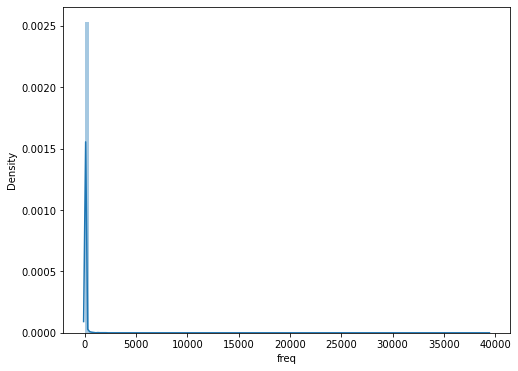

In [33]:
#let's find out how many tags there are, the distribution of tags in corpus and the highest frequency words
#filtering tags adopting a "frequency-based" approach 
#filtering required because it helps topic modelling which clusters terms into topics based on both frequency and semantic
#relatedness of terms 

#tokenise tags column
tokenized_tags = merged['char_filtered'].astype(str).apply(nltk.word_tokenize)
#transform to dictionary
id2word = corpora.Dictionary(tokenized_tags)
#print # of tags in column
print('Total Vocabulary Size:', len(id2word))

#next create corpus/doc-term matrix
corpus = [id2word.doc2bow(tag) for tag in tokenized_tags]

#let's check out the frequency of tags in corpus
dict_corpus = {}

for i in range(len(corpus)): #loop through each tag in the entire corpus
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus: #for each word put into dict_corpus but if the same word exists already in dict_corpus add by freq 
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq #else keep frequency the same 

    #transformn to df
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

#plot
plt.figure(figsize=(8,6))
sns.distplot(dict_df['freq'], bins=100);

#as we see in the plot, some tags have much higher frequencies than others

#lets see these top 10 high-freqeuncy tags in desc order
dict_df.sort_values('freq', ascending=False).head(30)
tokenized_tags = merged['char_filtered'].astype(str).apply(nltk.word_tokenize)#we see that large-scale terms like edinburgh and scotland need to be removed but we knew this before having to create this table

In [6]:
tokenized_tags = merged['char_filtered'].astype(str).apply(nltk.word_tokenize)

#create dictionary of words to filter out and special characters
#words all come from frequeuncy list above and contain those that are indicative of landmarks e.g. castle
#or non-intuitive words e.g. instagramapp
filter_words = ['.',',',':',';','?','@','-','...','!','=', '``','''', ''', '[',']','edinburgh', 'ecosse', 'écosse', 'scotland','gb','greatbritain','britain','glasgow','europe',
               'unitedkingdom', 'street', 'iansdigitalphotos', 'city','uploaded','d', 'dimbourg', 'edimbourg' , 'castle',
               'blackandwhite', 'edinburghcastle','iphoneography', 'europe','exif','squareformat', 'instagramapp', 'scottish']
merged["custom_filter"] = [[t for t in tok_sent if t not in filter_words] for tok_sent in tokenized_tags]

In [7]:
#convert list back to string
merged['custom_filter'] = merged['custom_filter'].str.join(' ')

In [8]:
#remove empty rows with no tags now that I've done regex and filtered out high-frequency tag words

#first convert empty strings to NA
merged['custom_filter'].replace('', np.nan, inplace=True)

#then drop
merged.dropna(subset = ["custom_filter"], inplace=True)


#reset index so it runs from 1 to whatever the last entry is without random gaps
merged.reset_index(drop=True)

,Unnamed: 0,index,Unnamed: 0.1,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,...,secret,tags,title,url_n,date,time,year,short_filtered,char_filtered,custom_filter
0,0,0,0,16,0,2010-09-01 13:15:00,0,0,5,0,...,17d70c22ce,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,09/01/2010,13:15:00,2010,winter snow ice docks river scotland boat froz...,winter snow ice docks river scotland boat froz...,winter snow ice docks river boat frozen ship y...
1,1,1,1,16,0,2010-08-01 15:10:00,0,0,5,0,...,fb6cb30938,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,08/01/2010,15:10:00,2010,bridge winter snow ice church scotland canal e...,bridge winter snow ice church scotland canal e...,bridge winter snow ice church canal harrisonpa...
2,2,2,4,16,0,2010-02-01 12:19:00,0,0,5,0,...,82095fb86c,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,02/01/2010,12:19:00,2010,architecture,architecture,architecture
3,3,3,5,16,0,2010-01-01 17:31:00,0,0,5,0,...,75a1649e18,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/4053/4234840366_...,01/01/2010,17:31:00,2010,scotland edinburgh puppet newyear holyrood roy...,scotland edinburgh puppet newyear holyrood roy...,puppet newyear holyrood royalmile holyroodhous...
4,5,7,11,16,0,2010-09-01 15:12:00,0,0,3,0,...,2.56E+33,plumber,Super mario,https://live.staticflickr.com/2719/4259628026_...,09/01/2010,15:12:00,2010,plumber,plumber,plumber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50143,2813521,24357,30522,16,0,2014-12-05 16:20:00,0,0,1,0,...,9351e77de9,city holiday scotland edinburgh view,NaN,https://live.staticflickr.com/647/22021302371_...,12/05/2014,16:20:00,2014,city holiday scotland edinburgh view,city holiday scotland edinburgh view,holiday view
50144,2813537,24404,30573,16,0,2014-05-27 14:27:00,0,0,9,0,...,d6ce42b880,architecture canon scotland sigma nationalmuse...,Animal World,https://live.staticflickr.com/8674/16636479772...,27/05/2014,14:27:00,2014,architecture canon scotland sigma nationalmuse...,architecture canon scotland sigma nationalmuse...,architecture canon sigma nationalmuseumofscotl...
50145,2813539,24406,30575,16,0,2014-05-25 12:49:00,0,0,4,0,...,92b22b8f81,cruise scotland edinburgh ship victoria queen ...,Liz and John,https://live.staticflickr.com/3880/14397169893...,25/05/2014,12:49:00,2014,cruise scotland edinburgh ship victoria queen ...,cruise scotland edinburgh ship victoria queen ...,cruise ship victoria queen newhaven cunard
50146,2813544,24407,30576,16,0,2014-05-23 22:31:00,0,0,4,0,...,eed92e668a,edinburgh missoni,Missoni Kilt at G&V Hotel,https://live.staticflickr.com/3847/14321461596...,23/05/2014,22:31:00,2014,edinburgh missoni,edinburgh missoni,missoni


In [11]:
#from inspection, I see rows without lat and longs - these have been formed because of inner joins before

#first convert empty strings to NA
merged['latitude'].replace('', np.nan, inplace=True)
merged['longitude'].replace('', np.nan, inplace=True)

#then drop
merged.dropna(subset = ["latitude"], inplace=True)
merged.dropna(subset = ["longitude"], inplace=True)

In [13]:
#now remove duplicate rows
merged.drop_duplicates(subset=['latitude', 'longitude', 'tags','owner'], keep = "first", inplace = True)
merged

,Unnamed: 0,index,Unnamed: 0.1,accuracy,context,datetaken,datetakengranularity,datetakenunknown,farm,geo_is_contact,...,secret,tags,title,url_n,date,time,year,short_filtered,char_filtered,custom_filter
0,0,0,0,16,0,2010-09-01 13:15:00,0,0,5,0,...,17d70c22ce,winter snow ice docks river scotland boat froz...,Icebreaker Needed...,https://live.staticflickr.com/4039/4269213164_...,09/01/2010,13:15:00,2010,winter snow ice docks river scotland boat froz...,winter snow ice docks river scotland boat froz...,winter snow ice docks river boat frozen ship y...
1,1,1,1,16,0,2010-08-01 15:10:00,0,0,5,0,...,fb6cb30938,bridge winter snow ice church scotland canal e...,"Union Canal, January 01",https://live.staticflickr.com/4045/4277833924_...,08/01/2010,15:10:00,2010,bridge winter snow ice church scotland canal e...,bridge winter snow ice church scotland canal e...,bridge winter snow ice church canal harrisonpa...
2,2,2,4,16,0,2010-02-01 12:19:00,0,0,5,0,...,82095fb86c,architecture,IMG_0701,https://live.staticflickr.com/4057/4263150530_...,02/01/2010,12:19:00,2010,architecture,architecture,architecture
3,3,3,5,16,0,2010-01-01 17:31:00,0,0,5,0,...,75a1649e18,scotland edinburgh puppet newyear holyrood roy...,"The Big Man, Holyrood",https://live.staticflickr.com/4053/4234840366_...,01/01/2010,17:31:00,2010,scotland edinburgh puppet newyear holyrood roy...,scotland edinburgh puppet newyear holyrood roy...,puppet newyear holyrood royalmile holyroodhous...
4,5,7,11,16,0,2010-09-01 15:12:00,0,0,3,0,...,2.56E+33,plumber,Super mario,https://live.staticflickr.com/2719/4259628026_...,09/01/2010,15:12:00,2010,plumber,plumber,plumber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26032,32950,49941,63975,16,0,2019-12-23 22:58:00,0,0,66,0,...,0b9b5b8a56,mia britishshorthair britishblueshorthair brit...,"Mia, December 2019",https://live.staticflickr.com/65535/4937454765...,23/12/2019,22:58:00,2019,mia britishshorthair britishblueshorthair brit...,mia britishshorthair britishblueshorthair brit...,mia britishshorthair britishblueshorthair brit...
26033,32951,49942,63977,16,0,2019-12-22 18:37:00,0,0,66,0,...,371150b625,iansdigitalphotos edinburghchristmas2019 night...,Christmas treats,https://live.staticflickr.com/65535/4926039462...,22/12/2019,18:37:00,2019,iansdigitalphotos edinburghchristmas2019 night...,iansdigitalphotos edinburghchristmas night...,edinburghchristmas nightscene
26034,32952,49943,63979,16,0,2019-12-21 23:20:00,0,0,66,0,...,de30620c44,edinburgh jazzbar trumpet musician male,"The Jazz Bar, Edinburgh",https://live.staticflickr.com/65535/4927802449...,21/12/2019,23:20:00,2019,edinburgh jazzbar trumpet musician male,edinburgh jazzbar trumpet musician male,jazzbar trumpet musician male
26035,32953,49945,63981,16,0,2019-12-21 19:58:00,0,0,66,0,...,4e4b611fa9,karaoke 2019 christmas,"Richard's Christmas Drinks, Dec 2019",https://live.staticflickr.com/65535/4937425722...,21/12/2019,19:58:00,2019,karaoke 2019 christmas,karaoke christmas,karaoke christmas


In [14]:
#export analysis data (containing ALL entries)
merged.to_csv("analysis_data.csv")

In [15]:
#let's try and identify tourists from daily users/residents
#note: I am using the merged dataset as input which has participation inequality removed
tourists = pd.DataFrame(merged.groupby(['owner']).\
                              agg({'datetaken' : [np.min, np.max]})).reset_index(drop=False)

#droplevel set to 0 to dissolve 'levels' in df columns
tourists.columns = tourists.columns.droplevel(0)


#convert amin and amax columns to datetime dtype
tourists['amin'] = pd.to_datetime(tourists['amin']) 
tourists['amax'] = pd.to_datetime(tourists['amax']) 

#check to see if it's worked
#image_per_24_hrs_ver2.info()

#create new field in df showing T/F based on conditional operator
#If min and max posting times are within 5 days, highlight as True
tourists['within120_hrs'] = np.where(tourists['amax'] - tourists['amin'] < timedelta(hours=120), 
                                           True, False)

#label the columns to fill in non-filled titles
tourists.columns =['owner', 'amin','amax', 'within_120_hrs']
tourists = tourists[(tourists['within_120_hrs'] == True)] 

tourists
#so we identify 1105 tourists

,owner,amin,amax,within_120_hrs
0,10002350@N00,2017-04-20 12:06:00,2017-04-20 12:06:00,True
2,100314969@N03,2013-09-28 15:37:00,2013-09-28 16:57:00,True
3,100406338@N02,2018-08-13 11:42:00,2018-08-13 15:36:00,True
6,100857282@N08,2013-08-19 22:48:00,2013-08-24 13:00:00,True
8,100902742@N07,2015-05-02 13:04:00,2015-05-02 13:04:00,True
...,...,...,...,...
2428,99363576@N06,2015-07-16 15:11:00,2015-07-18 11:50:00,True
2430,99456529@N00,2011-12-24 13:35:00,2011-12-25 06:56:00,True
2431,99508111@N04,2014-04-26 16:50:00,2014-04-26 16:56:00,True
2432,99527754@N08,2015-04-23 07:06:00,2015-04-26 16:46:00,True


In [18]:
#find all posts by tourist from the df_filtered df based on the tourists df
tourist_df = merged[merged['owner'].isin(tourists['owner'])].reset_index(drop= True)
tourist_df
#4296 posts posted by tourists...
# therefore... 19254 posts made by daily residents 

#tourist_df.to_csv(r'flickr_tourists_2010_19.csv', index = True)

In [19]:
#extract entries posted by locals
#use tourist_df as a subset of the tags_only df to be weeded out
locals_df = merged[merged['owner'].isin(tourist_df['owner']) == False]
locals_df

#save to csv
#locals_df.to_csv(r'flickr_locals_2010_19.csv', index = True)

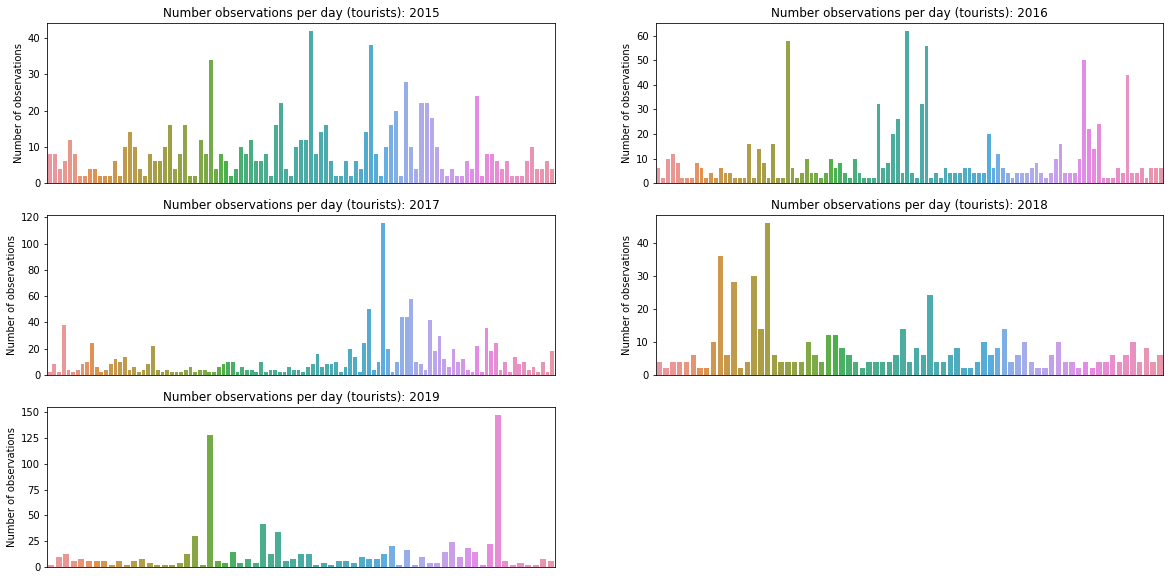

In [115]:
#lets now see the distibution of posts made by tourists
def tourist_distr_plot(ax, yr):
    '''
    Draw countplot of posts per day per year
    '''
    
    sns.countplot(x='date', data=tourist_df[tourist_df.year == yr], ax=ax) #join the desired df columns/plot params to function's parameters
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.xaxis.set_ticks([])
    plt.yscale('log')
    ax.set_ylabel('Number of observations')
    ax.set_title('Number observations per day (tourists): %i' % yr)

fig, axes = plt.subplots(3, 2); axes = axes.flatten() #sets plotting dimensions to 2x2
fig.set_size_inches(20,10)

years = [2015,2016,2017, 2018, 2019]
for (ax, yr) in zip(axes, years): #draw plot using above-defined function for data in years 2017-19 
    tourist_distr_plot(ax, yr)
    
fig.delaxes(axes[5]) #hide the fourth plot as dimension originally set to 2x2 (4 plots)
plt.show()

#distributions sort of compares to the orignal unfiltered dataset containing both social groups 

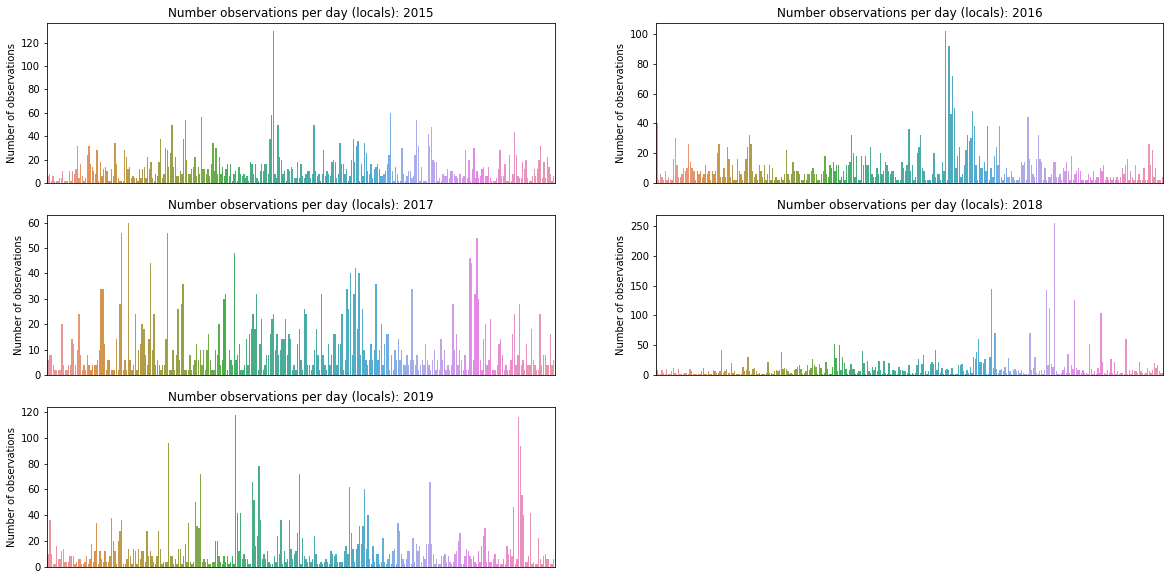

In [116]:
#repeat for locals
def locals_distr_plot(ax, yr):
    '''
    Draw countplot of posts per day per year
    '''
    
    sns.countplot(x='date', data=locals_df[locals_df.year == yr], ax=ax) #join the desired df columns/plot params to function's parameters
    ax.set_xlabel('')
    ax.set_xticklabels('')
    ax.xaxis.set_ticks([])
    plt.yscale('log')
    ax.set_ylabel('Number of observations')
    ax.set_title('Number observations per day (locals): %i' % yr)

fig, axes = plt.subplots(3, 2); axes = axes.flatten() #sets plotting dimensions to 2x2
fig.set_size_inches(20,10)

years = [2015,2016,2017, 2018, 2019]
for (ax, yr) in zip(axes, years): #draw plot using above-defined function for data in years 2017-19 
    locals_distr_plot(ax, yr)
    
fig.delaxes(axes[5]) #hide the fourth plot as dimension originally set to 2x2 (4 plots)
plt.show()


In [ ]:
#resources:
https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-text-pre-processing-with-python-example/